# Optimiseur ADAGRAD

## I.	Présentation de l'algorithme Adagrad
L'algorithme Adagrad est une méthode d'optimisation des algorithmes d'apprentissage automatique, principalement utilisée pour l'optimisation des paramètres d'un modèle dans le cadre de l'apprentissage profond. Il a été introduit par John Duchi, Elad Hazan et Yoram Singer en 2011.
L'objectif principal d'Adagrad est d'ajuster les taux d'apprentissage des différents paramètres du modèle de manière adaptative, en prenant en compte leur comportement passé. Contrairement à certaines méthodes d'optimisation qui utilisent un taux d'apprentissage global constant, Adagrad adapte le taux d'apprentissage pour chaque paramètre individuellement.
En résumé, Adagrad est un algorithme d'optimisation adaptatif qui ajuste les taux d'apprentissage des paramètres en fonction de l'historique des mises à jour des gradients. Il est couramment utilisé dans les méthodes d'apprentissage profond et a permis d'améliorer les performances de nombreux modèles en permettant une adaptation plus fine des taux d'apprentissage.


## II.	Fonctionnement de l'algorithme Adagrad
L'algorithme Adagrad est une méthode d'optimisation utilisée pour entraîner des modèles d'apprentissage automatique, en particulier dans le domaine de l'apprentissage profond. Il s'agit d'une variante de la descente de gradient stochastique (SGD) qui adapte automatiquement le taux d'apprentissage pour chaque poids du modèle, en fonction de l'historique des gradients précédents.
Voici le fonctionnement de l'algorithme Adagrad en quelques étapes :
Initialisation : Tout d'abord, les poids du modèle sont initialisés avec des valeurs aléatoires ou avec une autre méthode d'initialisation. De plus, une variable d'accumulation des carrés des gradients, appelée "accumulateur", est initialisée pour chaque poids. L'accumulateur est une matrice diagonale qui stocke la somme des carrés des gradients précédents pour chaque poids.
Calcul du gradient : Lors de chaque itération de l'entraînement, un lot (batch) d'exemples d'entraînement est utilisé pour calculer le gradient de la fonction de perte par rapport aux poids du modèle. Le gradient mesure la direction et l'amplitude du changement à apporter aux poids pour minimiser la perte.
Mise à jour des accumulateurs : Une fois le gradient calculé, les accumulateurs sont mis à jour. Chaque élément de l'accumulateur est augmenté en ajoutant le carré du gradient correspondant. Cela signifie que plus un poids est mis à jour fréquemment avec des gradients importants, plus son accumulateur sera élevé.
Mise à jour des poids : Ensuite, les poids du modèle sont mis à jour en utilisant la formule suivante pour chaque poids : nouveau poids = poids actuel - (taux apprentissage / racine carrée (accumulateur + epsilon)) * gradient
$$W_{i+1}\rightarrow W_{i} - \frac{Lr}{\sqrt{Accumulateur + \epsilon}} * Gradients$$
où taux apprentissage est un hyper paramètre qui contrôle la taille des pas de mise à jour des poids, racine carrée représente la fonction de racine carrée, accumulateur est la valeur actuelle dans l'accumulateur pour le poids correspondant, epsilon est un terme de régularisation pour éviter la division par zéro et gradient est la valeur du gradient calculée précédemment.



## III.	Avantages et inconvénients d'Adagrad
- Avantages :  
Le taux d'apprentissage change pour chaque paramètre d'entraînement.  Adaptation des taux d'apprentissage : Adagrad ajuste automatiquement les taux d'apprentissage pour chaque paramètre du modèle en fonction de leur historique des gradients. Cela permet de mettre à jour les paramètres avec des taux d'apprentissage plus élevés pour les paramètres moins fréquemment mis à jour et des taux d'apprentissage plus faibles pour les paramètres fréquemment mis à jour. Cela peut aider à obtenir une convergence plus rapide et une meilleure optimisation.  Pas besoin de régler le taux d'apprentissage manuellement : Avec Adagrad, il n'est généralement pas nécessaire de régler manuellement le taux d'apprentissage. L'optimiseur adapte automatiquement les taux d'apprentissage pour chaque paramètre, ce qui peut faciliter le processus d'optimisation.  Capable de s'entraîner sur des données rares.     
- Inconvénients :
Sa principale faiblesse est l'accumulation des gradients au carré ( Gt ) dans le dénominateur. Étant donné que chaque terme ajouté est positif, la somme accumulée continue de croître pendant la formation, ce qui entraîne une diminution du taux d'apprentissage et devient infiniment petit, ce qui conduit à une convergence lente.  Moins efficace que certains autres algorithmes d'optimisation comme AdaDelta et Adam


## IV.	Comparaison avec d'autres algorithmes d'optimisation
### Descente de gradient stochastique (SGD):
- Simplicité
- Convergence lente
- Sensible aux valeurs initiales des paramètres
### Momentum :
- Utilise le concept de moment pour accélérer la convergence
- Atténue l'impact des fluctuations de gradient
- Aide à sortir des minimas locaux et éviter les plateaux
### AdaGrad :
- Adapte le taux d'apprentissage pour chaque paramètre en fonction de l'historique des gradients
- Efficace pour les données rares ou bruitées
- Réduit le taux d'apprentissage pour les paramètres avec de grands gradients accumulés
### RMSprop :
- Variante d'AdaGrad qui résout le problème de l'accumulation des carrés des gradients
- Utilise une moyenne mobile des carrés des gradients
- Conserve une adaptation dynamique du taux d'apprentissage
### Adam :
- Combinaison du Momentum et de RMSprop
- Estimation adaptative du premier moment (moyenne des gradients) et du second moment non centralisé (moyenne mobile des carrés des gradients)
- Adaptation fine du taux d'apprentissage pour chaque paramètre
- Convergence rapide, même avec des taux d'apprentissage élevés

En résumé, la descente de gradient stochastique est simple mais converge lentement, tandis que les optimiseurs Momentum, AdaGrad, RMSprop et Adam apportent des améliorations spécifiques en termes d'accélération de la convergence, d'adaptation du taux d'apprentissage et de gestion des problèmes potentiels. Le choix de l'optimiseur dépend du problème, des données et des performances recherchées.


## V.	Exemples d'application 

In [221]:
#Importation des bibliothèque
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [222]:
df = pd.read_csv('diabetes.csv'); # Pour tester notre modèle nous avons les données de prédiction du diabtète
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [223]:
#Séparation des Input et Output
Y = df['Outcome']
X = df.drop('Outcome', axis=1)

In [224]:
#initialisation du model
model =tf.keras.models.Sequential()
print(model)
# 1.  input layer 
model.add(tf.keras.layers.Dense(8,input_dim=8,activation='relu'))
# 2: Couche cachers
model.add(tf.keras.layers.Dense(3,activation='sigmoid'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='sigmoid'))

# 3 / output layers
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))

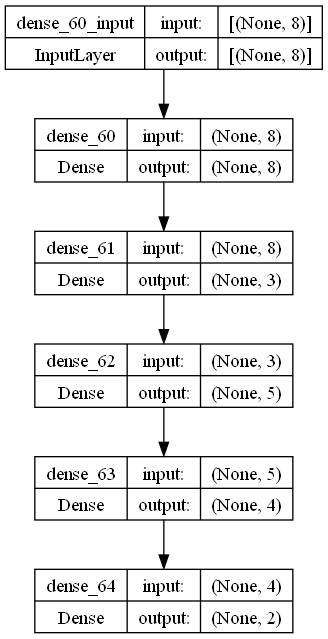

In [225]:
#Visualisation du modèle
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [226]:
# Voir la configuration du model
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 8)                 72        
                                                                 
 dense_61 (Dense)            (None, 3)                 27        
                                                                 
 dense_62 (Dense)            (None, 5)                 20        
                                                                 
 dense_63 (Dense)            (None, 4)                 24        
                                                                 
 dense_64 (Dense)            (None, 2)                 10        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [234]:
# Compilation du modèle
model.compile(optimizer=tf.keras.optimizers.Adagrad(),loss='binary_crossentropy',metrics=['accuracy'])

In [235]:
# Séparation des données teste et train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [236]:
# Centrer les données de sortie en deux catégories
from keras.utils import np_utils
y_train = np_utils.to_categorical(Y_train,2)
y_test = np_utils.to_categorical(Y_test,2)

In [237]:
# Entraînement du modèle
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
17/17 [==============================] - 1s 11ms/step - loss: 0.5932 - accuracy: 0.6834 - val_loss: 0.6115 - val_accuracy: 0.6450
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5878 - accuracy: 0.6853 - val_loss: 0.6106 - val_accuracy: 0.6407
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5873 - accuracy: 0.6909 - val_loss: 0.6103 - val_accuracy: 0.6364
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5871 - accuracy: 0.6909 - val_loss: 0.6099 - val_accuracy: 0.6364
Epoch 5/50
17/17 [==============================] - 0s 6ms/step - loss: 0.5867 - accuracy: 0.6890 - val_loss: 0.6096 - val_accuracy: 0.6364
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.6872 - val_loss: 0.6094 - val_accuracy: 0.6364
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5865 - accuracy: 0.6853 - val_loss: 0.6093 - val_accuracy: 0.6320
Epoch 8/50
17/17 [=

In [238]:
pred_mlp = model.predict(X_test)
mlp_acc = accuracy_score(y_test, pred_mlp.round())
print('accuracy du MLP', mlp_acc)

8/8 [==============================] - 0s 2ms/step
accuracy du MLP 0.6406926406926406


In [232]:
# test du modèle avec des lr static
lr=[0.01,0.02,0.03,0.04,0.05]
acc2=[]
for i in lr :
    # Compilation du modèle
    model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=i),loss='binary_crossentropy',metrics=['accuracy'])
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
    y_train = np_utils.to_categorical(Y_train,2)
    y_test = np_utils.to_categorical(Y_test,2)
    model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50)
    pred_mlp2 = model.predict(X_test)
    acc2.append('Pour lr='+str(i)+' '+str(accuracy_score(y_test, pred_mlp2.round())))
    
    

Epoch 1/50
17/17 [==============================] - 1s 12ms/step - loss: 0.7603 - accuracy: 0.6387 - val_loss: 0.7446 - val_accuracy: 0.6797
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7424 - accuracy: 0.6387 - val_loss: 0.7293 - val_accuracy: 0.6797
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7301 - accuracy: 0.6387 - val_loss: 0.7180 - val_accuracy: 0.6797
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7207 - accuracy: 0.6387 - val_loss: 0.7091 - val_accuracy: 0.6797
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7132 - accuracy: 0.6387 - val_loss: 0.7017 - val_accuracy: 0.6797
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.6387 - val_loss: 0.6955 - val_accuracy: 0.6797
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7017 - accuracy: 0.6387 - val_loss: 0.6902 - val_accuracy: 0.6797
Epoch 8/50
17/17 [=

Epoch 9/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.6387 - val_loss: 0.6317 - val_accuracy: 0.6797
Epoch 10/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.6387 - val_loss: 0.6318 - val_accuracy: 0.6797
Epoch 11/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6387 - val_loss: 0.6315 - val_accuracy: 0.6797
Epoch 12/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.6387 - val_loss: 0.6315 - val_accuracy: 0.6797
Epoch 13/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.6387 - val_loss: 0.6313 - val_accuracy: 0.6797
Epoch 14/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6387 - val_loss: 0.6312 - val_accuracy: 0.6797
Epoch 15/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.6387 - val_loss: 0.6310 - val_accuracy: 0.6797
Epoch 16/50
17

Epoch 17/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6495 - accuracy: 0.6387 - val_loss: 0.6265 - val_accuracy: 0.6797
Epoch 18/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6492 - accuracy: 0.6387 - val_loss: 0.6264 - val_accuracy: 0.6797
Epoch 19/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6495 - accuracy: 0.6387 - val_loss: 0.6264 - val_accuracy: 0.6797
Epoch 20/50
17/17 [==============================] - 0s 6ms/step - loss: 0.6494 - accuracy: 0.6387 - val_loss: 0.6263 - val_accuracy: 0.6797
Epoch 21/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.6387 - val_loss: 0.6263 - val_accuracy: 0.6797
Epoch 22/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6489 - accuracy: 0.6387 - val_loss: 0.6261 - val_accuracy: 0.6797
Epoch 23/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.6387 - val_loss: 0.6260 - val_accuracy: 0.6797
Epoch 24/50
1

Epoch 25/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.6387 - val_loss: 0.6230 - val_accuracy: 0.6797
Epoch 26/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6429 - accuracy: 0.6387 - val_loss: 0.6228 - val_accuracy: 0.6797
Epoch 27/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6417 - accuracy: 0.6387 - val_loss: 0.6210 - val_accuracy: 0.6797
Epoch 28/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6411 - accuracy: 0.6387 - val_loss: 0.6209 - val_accuracy: 0.6797
Epoch 29/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6433 - accuracy: 0.6387 - val_loss: 0.6288 - val_accuracy: 0.6797
Epoch 30/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6433 - accuracy: 0.6387 - val_loss: 0.6212 - val_accuracy: 0.6797
Epoch 31/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6409 - accuracy: 0.6387 - val_loss: 0.6218 - val_accuracy: 0.6797
Epoch 32/50
1

Epoch 33/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6149 - accuracy: 0.6574 - val_loss: 0.6074 - val_accuracy: 0.6667
Epoch 34/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6005 - accuracy: 0.6723 - val_loss: 0.6028 - val_accuracy: 0.6840
Epoch 35/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.6890 - val_loss: 0.6087 - val_accuracy: 0.6364
Epoch 36/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5986 - accuracy: 0.6816 - val_loss: 0.6019 - val_accuracy: 0.6710
Epoch 37/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6051 - accuracy: 0.6797 - val_loss: 0.6088 - val_accuracy: 0.6580
Epoch 38/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5965 - accuracy: 0.6797 - val_loss: 0.5980 - val_accuracy: 0.6883
Epoch 39/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6073 - accuracy: 0.6741 - val_loss: 0.6072 - val_accuracy: 0.6407
Epoch 40/50
1

In [233]:
acc2

['Pour lr=0.01 0.6796536796536796',
 'Pour lr=0.02 0.6796536796536796',
 'Pour lr=0.03 0.6796536796536796',
 'Pour lr=0.04 0.5627705627705628',
 'Pour lr=0.05 0.6277056277056277']

Ce phénomène explique que pour Adagrade nous avons pas besoins d'optimiser le taux d'apprentisagge il ce charge automatiquement du taux d'apprentissage

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(Y_train,2)
y_test = np_utils.to_categorical(Y_test,2)

In [167]:
# Comparaisons des optimisateurs
opt= ['adam','adagrad','sgd','adadelta']
acc=[]
for i in range(0,len(opt)) :
    model.compile(optimizer=opt[i],loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50)
    pred_model = model.predict(X_test)
    acc.append(opt[i]+' ' +str(accuracy_score(y_test, pred_model.round())))
    

Epoch 1/50
17/17 [==============================] - 1s 14ms/step - loss: 0.6312 - accuracy: 0.6387 - val_loss: 0.6090 - val_accuracy: 0.6797
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.6387 - val_loss: 0.6085 - val_accuracy: 0.6797
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6291 - accuracy: 0.6387 - val_loss: 0.6075 - val_accuracy: 0.6797
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6284 - accuracy: 0.6387 - val_loss: 0.6076 - val_accuracy: 0.6797
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6291 - accuracy: 0.6387 - val_loss: 0.6066 - val_accuracy: 0.6797
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6267 - accuracy: 0.6387 - val_loss: 0.6056 - val_accuracy: 0.6797
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 0.6262 - accuracy: 0.6387 - val_loss: 0.6047 - val_accuracy: 0.6797
Epoch 8/50
17/17 [=

Epoch 9/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5849 - accuracy: 0.6387 - val_loss: 0.5817 - val_accuracy: 0.6797
Epoch 10/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5849 - accuracy: 0.6387 - val_loss: 0.5816 - val_accuracy: 0.6797
Epoch 11/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5849 - accuracy: 0.6387 - val_loss: 0.5816 - val_accuracy: 0.6797
Epoch 12/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5849 - accuracy: 0.6387 - val_loss: 0.5816 - val_accuracy: 0.6797
Epoch 13/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5847 - accuracy: 0.6387 - val_loss: 0.5816 - val_accuracy: 0.6797
Epoch 14/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5847 - accuracy: 0.6387 - val_loss: 0.5817 - val_accuracy: 0.6797
Epoch 15/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5848 - accuracy: 0.6387 - val_loss: 0.5817 - val_accuracy: 0.6797
Epoch 16/50
17

Epoch 17/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5942 - accuracy: 0.6387 - val_loss: 0.5932 - val_accuracy: 0.6797
Epoch 18/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5942 - accuracy: 0.6387 - val_loss: 0.5841 - val_accuracy: 0.6797
Epoch 19/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5898 - accuracy: 0.6387 - val_loss: 0.5914 - val_accuracy: 0.6797
Epoch 20/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6002 - accuracy: 0.6387 - val_loss: 0.5800 - val_accuracy: 0.6797
Epoch 21/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5932 - accuracy: 0.6387 - val_loss: 0.5840 - val_accuracy: 0.6797
Epoch 22/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5934 - accuracy: 0.6387 - val_loss: 0.5841 - val_accuracy: 0.6797
Epoch 23/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5895 - accuracy: 0.6387 - val_loss: 0.5808 - val_accuracy: 0.6797
Epoch 24/50
1

Epoch 25/50
17/17 [==============================] - 0s 6ms/step - loss: 0.5947 - accuracy: 0.6387 - val_loss: 0.5851 - val_accuracy: 0.6797
Epoch 26/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5947 - accuracy: 0.6387 - val_loss: 0.5850 - val_accuracy: 0.6797
Epoch 27/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5947 - accuracy: 0.6387 - val_loss: 0.5850 - val_accuracy: 0.6797
Epoch 28/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5946 - accuracy: 0.6387 - val_loss: 0.5850 - val_accuracy: 0.6797
Epoch 29/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5946 - accuracy: 0.6387 - val_loss: 0.5849 - val_accuracy: 0.6797
Epoch 30/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.6387 - val_loss: 0.5849 - val_accuracy: 0.6797
Epoch 31/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.6387 - val_loss: 0.5849 - val_accuracy: 0.6797
Epoch 32/50
1

In [168]:
acc

['adam 0.6796536796536796',
 'adagrad 0.6796536796536796',
 'sgd 0.4155844155844156',
 'adadelta 0.43722943722943725']

Nous constatons que Adam et Adagrad donnent les plus grandes accuracy

## Conclusion
En résumé, l'optimiseur Adagrad est un choix solide pour l'optimisation en Deep Learning, offrant des avantages tels que l'adaptation automatique du taux d'apprentissage et la gestion des problèmes de données rares. Cependant, il est important de surveiller attentivement son comportement pour éviter les problèmes de convergence lente ou de diminution du taux d'apprentissage. En fin de compte, le choix de l'optimiseur dépendra du problème spécifique et des caractéristiques du jeu de données, et il peut être utile d'expérimenter différentes options pour trouver la meilleure solution.
